<a href="https://colab.research.google.com/github/sudip234-source/Breast-Cancer-Prediction/blob/main/DL_Breast_cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
df = pd.DataFrame(np.c_[df['data'], df['target']], columns = np.append(df['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.shape

(569, 31)

(target
 1.0    357
 0.0    212
 Name: count, dtype: int64,
 <Axes: xlabel='target'>)

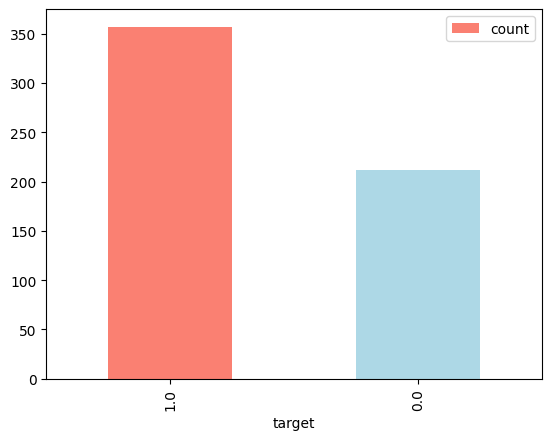

In [ ]:
df.target.value_counts(),df.target.value_counts().plot(kind='bar',color=['salmon','lightblue'],legend=['Benign','Malignant'])

1 -> Benign

0 -> Malignant

In [ ]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
X = df.drop(columns='target',axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape
#

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu',input_dim=30))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3500 - loss: 66.2175 - val_accuracy: 0.3478 - val_loss: 18.4782
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4419 - loss: 10.3199 - val_accuracy: 0.7174 - val_loss: 2.0601
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6417 - loss: 1.5608 - val_accuracy: 0.8696 - val_loss: 0.3457
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8110 - loss: 0.7849 - val_accuracy: 0.7391 - val_loss: 0.7209
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8068 - loss: 0.4534 - val_accuracy: 0.9130 - val_loss: 0.2853
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8689 - loss: 0.3168 - val_accuracy: 0.8913 - val_loss: 0.2365
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9017 - loss: 0.2803 - val_accuracy: 0.9565 - val_loss: 0.2160
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9073 - loss: 0.2604 - val_accuracy: 0.9565 - val_

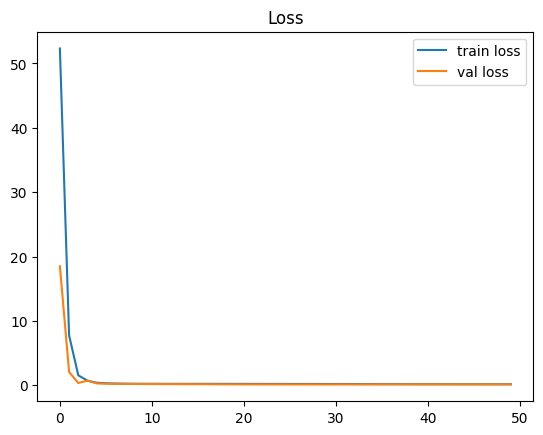

In [ ]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

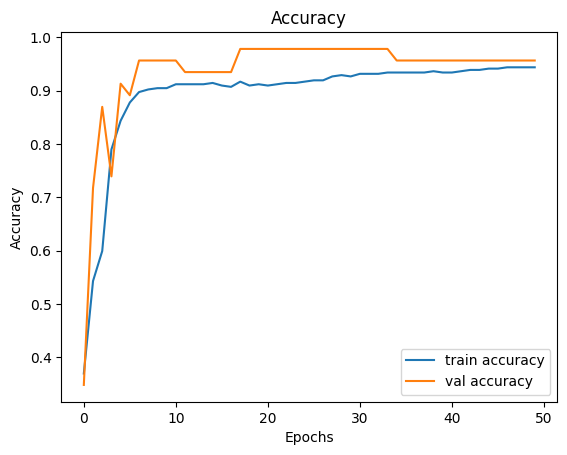

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history_scaled = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8331 - loss: 0.4730 - val_accuracy: 0.9565 - val_loss: 0.2750
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9004 - loss: 0.2755 - val_accuracy: 0.9565 - val_loss: 0.1751
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9111 - loss: 0.1886 - val_accuracy: 0.9783 - val_loss: 0.1219
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9457 - loss: 0.1295 - val_accuracy: 0.9783 - val_loss: 0.0884
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9717 - loss: 0.0951 - val_accuracy: 0.9783 - val_loss: 0.0690
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9840 - loss: 0.0750 - val_accuracy: 0.9783 - val_loss: 0.0605
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9891 - loss: 0.0632 - val_accuracy: 0.9783 - val_loss: 0.0570
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9891 - loss: 0.0561 - val_accuracy: 0.9783 - val_loss

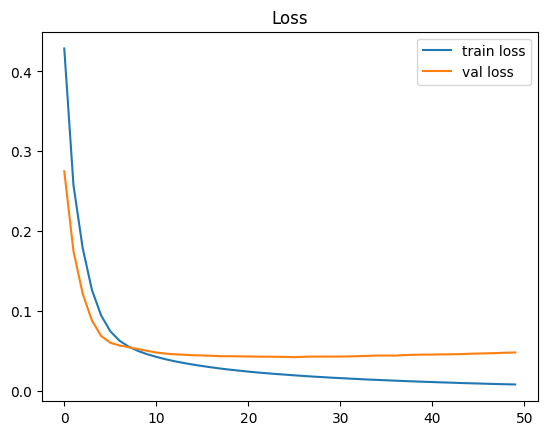

In [ ]:
plt.plot(history_scaled.history['loss'],label='train loss')
plt.plot(history_scaled.history['val_loss'],label='val loss')
plt.title('Loss')
plt.legend()
plt.show()

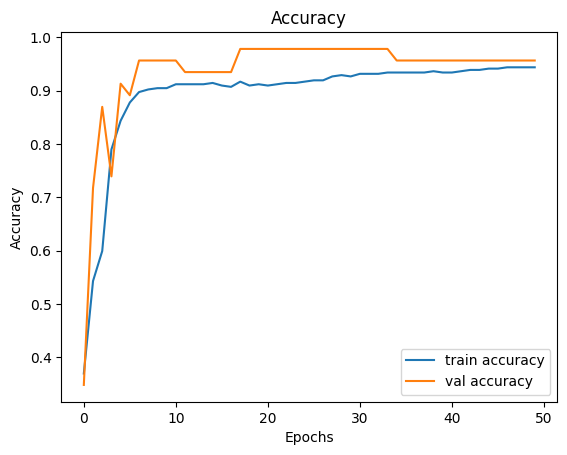

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test_scaled,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9658 - loss: 0.1459 


[0.16709692776203156, 0.9561403393745422]

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred[:5][0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([0.66226447], dtype=float32)

In [ ]:
y_out = np.where(y_pred>0.5,1,0)

In [ ]:
y_0 =np.sum(y_out==0)
y_1 =np.sum(y_out==1)


In [ ]:
y_0,y_1

(46, 68)

In [ ]:
yt_0 =np.sum(y_test==0)
yt_1 =np.sum(y_test==1)

In [ ]:
yt_0,yt_1

(45, 69)

In [ ]:
y_out.shape,y_test.shape

((114, 1), (114,))

In [ ]:
y_out = y_out.reshape(114,)

In [ ]:
res = np.count_nonzero(y_out==y_test)
res

109

In [ ]:
y_test

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])